In [1]:
import Pyntegrate
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bins = 100

features, atac_signal, tsses,tsses_1kb = Pyntegrate.SeqSignalAnalysis.generate_array_simple_signal(dbPath='/home/jerry/Documentos/Python3.10/prueba/data/gencode.vM25.annotation.gtf.db',
                                                                                                   filePath='/home/jerry/Documentos/Python3.10/prueba/mosimData/SampleDataDNase-seq-10000.bw',
                                                                                                   extensionFile='bigwig',
                                                                                                   genome='mm10',
                                                                                                   bins=bins)

features, chip_signal, tsses,tsses_1kb = Pyntegrate.SeqSignalAnalysis.generate_array_simple_signal(dbPath='/home/jerry/Documentos/Python3.10/prueba/data/gencode.vM25.annotation.gtf.db',
                                                                                                   filePath='/home/jerry/Documentos/Python3.10/prueba/mosimData/SampleDataChIP-seq-10000.bw',
                                                                                                   extensionFile='bigwig',
                                                                                                   genome='mm10',
                                                                                                   bins=bins)
data = Pyntegrate.results_table.DEseq2Results('/home/jerry/Documentos/Python3.10/prueba/mosimData/test_RNA-seq_w_changes.csv')
data.data['gene_id'] = data.data['GeneID']
data.reindex_to(tsses, attribute='gene_id')

,GeneID,Group1.Time0.Rep1,Group1.Time0.Rep2,Group1.Time0.Rep3,Group1.Time2.Rep1,Group1.Time2.Rep2,Group1.Time2.Rep3,Group1.Time4.Rep1,Group1.Time4.Rep2,Group1.Time4.Rep3,...,Group2.Time4.Rep3,Group2.Time12.Rep1,Group2.Time12.Rep2,Group2.Time12.Rep3,Group2.Time24.Rep1,Group2.Time24.Rep2,Group2.Time24.Rep3,FPKM_Group1_Time0_Rep1,log2foldchange,gene_id
ENSMUSG00000102693.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000064842.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000051951.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000102851.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000103377.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064368.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000064369.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000064370.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000064371.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
atac_signal_good, data = Pyntegrate.SeqSignalAnalysis.chip_or_atac_genes_not_used_with_rna(data,
                                                                                                atac_signal,
                                                                                                id="id",
                                                                                                rna_column_name="GeneID",
                                                                                                delete_no_peaks=True)

chip_signal_good, data = Pyntegrate.SeqSignalAnalysis.chip_or_atac_genes_not_used_with_rna(data,
                                                                                                chip_signal,
                                                                                                id="id",
                                                                                                rna_column_name="GeneID",
                                                                                                delete_no_peaks=True)
normalized_subtracted_atac , normalized_subtracted_chip = Pyntegrate.SeqSignalAnalysis.chip_genes_not_used_with_atac(atac_signal_good,chip_signal_good,by="id")

print(len(normalized_subtracted_atac),len(normalized_subtracted_chip),len(data))

Len signal 2069
Data type:  <class 'Pyntegrate.results_table.DEseq2Results'> 
 data filtered_type <class 'pandas.core.frame.DataFrame'>
Data lenght after filtered: 2069
Len signal 932
Data type:  <class 'Pyntegrate.results_table.DEseq2Results'> 
 data filtered_type <class 'pandas.core.frame.DataFrame'>
Data lenght after filtered: 932
 Termine lo alrgo
932 932 932


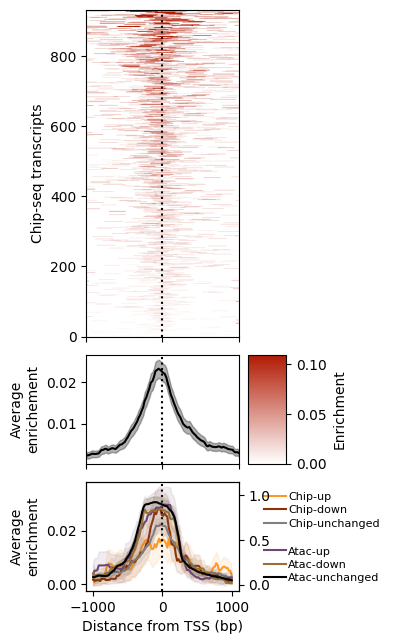

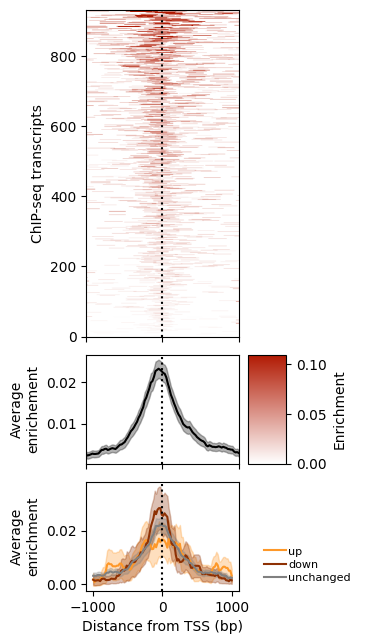

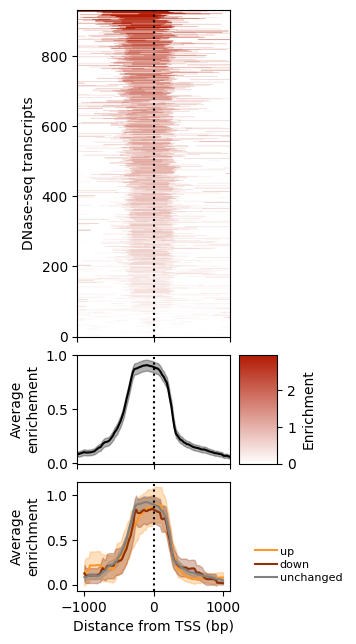

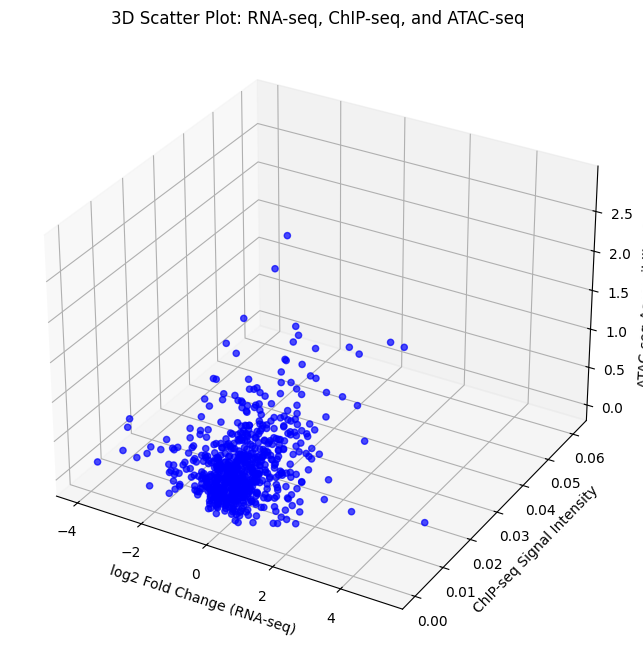

In [5]:
normalized_subtracted_atac, normalized_subtracted_chip =Pyntegrate.SeqSignalAnalysis.values_array(normalized_subtracted_atac, normalized_subtracted_chip)
x = np.linspace(-1000, 1000, bins)
fig = Pyntegrate.SeqSignalAnalysis.all_signal_together(normalized_subtracted_chip, normalized_subtracted_atac,data, xAxis=x)
fig = Pyntegrate.SeqSignalAnalysis.chip_atac_rna_diverse(normalized_subtracted_chip, normalized_subtracted_atac,data,xAxis=x)

fig = Pyntegrate.SeqSignalAnalysis.all_signal_together_new(normalized_subtracted_chip, normalized_subtracted_atac,data)